In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy.polynomial.polynomial as poly
from numpy.polynomial import Polynomial
import scipy.constants as const

In [16]:
#Data from vizier without treatment
raw_data = pd.read_csv(r"C:\Users\clauw\Documents\Programming\NIR_data_vizier.tsv", delimiter='\t',names=["Wave (cm)", "nFlux", "rFlux"])

In [17]:
#Convert the wavelength in A cause its in cm^-1 
raw_data['Wave A'] = (10**(8))/raw_data['Wave (cm)']

#Invert the values for the index in python
raw_data = raw_data.sort_values('Wave A', ascending=True, na_position='first').reset_index(drop=True)

raw_data

,Wave (cm),nFlux,rFlux,Wave A
0,9999.998732,0.996949,0.134761,10000.001268
1,9999.996849,0.997237,0.134800,10000.003151
2,9999.994966,0.997245,0.134802,10000.005034
3,9999.993083,0.996937,0.134760,10000.006917
4,9999.991199,0.997067,0.134778,10000.008801
...,...,...,...,...
3001255,4347.829323,0.944661,0.015909,22999.982882
3001256,4347.827440,0.938258,0.015800,22999.992845
3001257,4347.825556,0.934484,0.015736,23000.002807
3001258,4347.823673,0.930303,0.015666,23000.012770


In [21]:
#Lines from the excel
raw_lambda = pd.read_csv(r"C:\Users\clauw\Documents\Programming\Final-Project\Infrared range\Lines",delimiter='\t',names=['lambda', 'class'])
raw_lambda['Nave list'] = (10**8)/raw_lambda['lambda']
raw_lambda = raw_lambda[raw_lambda['Nave list'].between(10000,23001,inclusive='neither')].reset_index(drop=True)
raw_lambda

,lambda,class,Nave list
0,9990.40,7 B,10009.609225
1,9977.51,0.041666667,10022.540694
2,9975.02,0.291666667,10025.042556
3,9971.25,0.125,10028.832895
4,9964.51,0.291666667,10035.616403
...,...,...,...
2542,4373.35,3 B,22865.766518
2543,4368.95,0.333333333,22888.794791
2544,4358.94,5 B,22941.357302
2545,4354.97,0,22962.270693


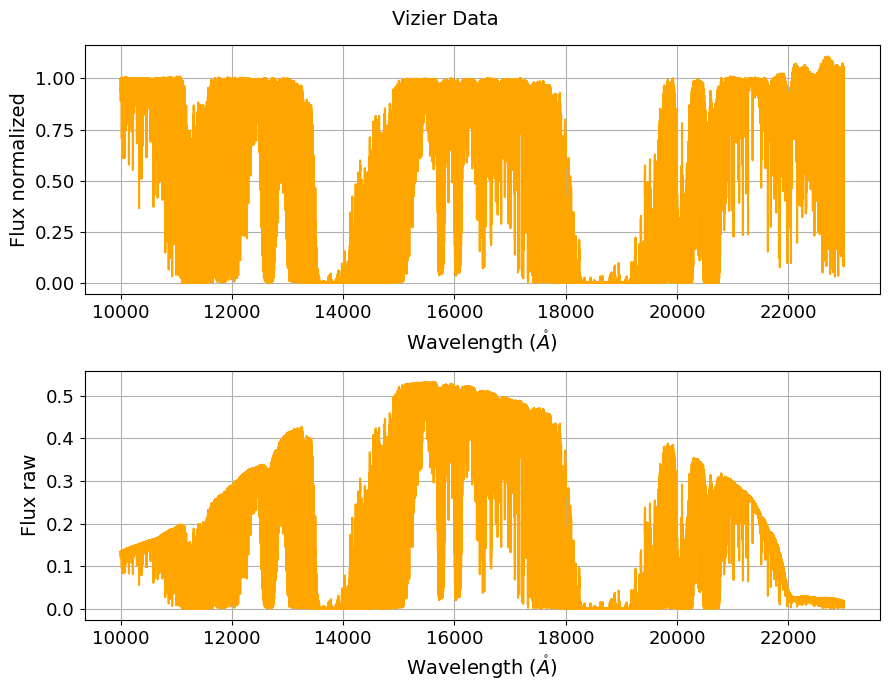

In [5]:
#Plot of raw data
fig1, axis1 = plt.subplots(2,1, figsize = (9, 7),)
ax1 = axis1[0]
ax2 = axis1[1]

fig1.suptitle(r'Vizier Data',fontsize=14)

ax1.plot(raw_data['Wave A'],raw_data['nFlux'],color='orange')
ax1.set_xlabel(r'Wavelength $(\mathring{A})$',fontsize=14)
ax1.set_ylabel('Flux normalized',fontsize=14)
ax1.grid()
ax1.tick_params(axis='both',labelsize=13)

ax2.plot(raw_data['Wave A'],raw_data['rFlux'],color='orange')
ax2.set_xlabel(r'Wavelength $(\mathring{A})$',fontsize=14)
ax2.set_ylabel('Flux raw',fontsize=14)
ax2.grid()
ax2.tick_params(axis='both',labelsize=13)

fig1.tight_layout()

### Wavelength classification

In [18]:
#between work like < or > but not the equal, reset the index for the other functions
data_10000_11000 = raw_data[raw_data['Wave A'].between(10000, 11000, inclusive='neither')].reset_index(drop=True)
data_11000_12000 = raw_data[raw_data['Wave A'].between(11000, 12000, inclusive='neither')].reset_index(drop=True)
data_12000_13000 = raw_data[raw_data['Wave A'].between(12000, 13000, inclusive='neither')].reset_index(drop=True)
data_13000_14000 = raw_data[raw_data['Wave A'].between(13000, 14000, inclusive='neither')].reset_index(drop=True)
data_14000_15000 = raw_data[raw_data['Wave A'].between(14000, 15000, inclusive='neither')].reset_index(drop=True)
data_15000_16000 = raw_data[raw_data['Wave A'].between(15000, 16000, inclusive='neither')].reset_index(drop=True)
data_16000_17000 = raw_data[raw_data['Wave A'].between(16000, 17000, inclusive='neither')].reset_index(drop=True)
data_17000_18000 = raw_data[raw_data['Wave A'].between(17000, 18000, inclusive='neither')].reset_index(drop=True)
data_18000_19000 = raw_data[raw_data['Wave A'].between(18000, 19000, inclusive='neither')].reset_index(drop=True)
data_19000_20000 = raw_data[raw_data['Wave A'].between(19000, 20000, inclusive='neither')].reset_index(drop=True)
data_20000_21000 = raw_data[raw_data['Wave A'].between(20000, 21000, inclusive='neither')].reset_index(drop=True)
data_21000_22000 = raw_data[raw_data['Wave A'].between(21000, 22000, inclusive='neither')].reset_index(drop=True)
data_22000_23000 = raw_data[raw_data['Wave A'].between(22000, 23000, inclusive='neither')].reset_index(drop=True)

data_18000_19000

,Wave (cm),nFlux,rFlux,Wave A
0,5555.554433,0.001446,0.000672,18000.003638
1,5555.552549,0.001507,0.000701,18000.009740
2,5555.550666,0.001631,0.000758,18000.015842
3,5555.548783,0.001799,0.000836,18000.021944
4,5555.546900,0.001839,0.000855,18000.028045
...,...,...,...,...
155256,5263.165677,0.001592,0.000689,18999.971905
155257,5263.163794,0.001293,0.000560,18999.978703
155258,5263.161911,0.001108,0.000479,18999.985502
155259,5263.160028,0.001212,0.000524,18999.992300


In [22]:
#Now from lambda
lambda_10000_11000 = raw_lambda[raw_lambda['Nave list'].between(10000, 11000, inclusive='neither')].reset_index(drop=True)
lambda_11000_12000 = raw_lambda[raw_lambda['Nave list'].between(11000, 12000, inclusive='neither')].reset_index(drop=True)
lambda_12000_13000 = raw_lambda[raw_lambda['Nave list'].between(12000, 13000, inclusive='neither')].reset_index(drop=True)
lambda_13000_14000 = raw_lambda[raw_lambda['Nave list'].between(13000, 14000, inclusive='neither')].reset_index(drop=True)
lambda_14000_15000 = raw_lambda[raw_lambda['Nave list'].between(14000, 15000, inclusive='neither')].reset_index(drop=True)
lambda_15000_16000 = raw_lambda[raw_lambda['Nave list'].between(15000, 16000, inclusive='neither')].reset_index(drop=True)
lambda_16000_17000 = raw_lambda[raw_lambda['Nave list'].between(16000, 17000, inclusive='neither')].reset_index(drop=True)
lambda_17000_18000 = raw_lambda[raw_lambda['Nave list'].between(17000, 18000, inclusive='neither')].reset_index(drop=True)
lambda_18000_19000 = raw_lambda[raw_lambda['Nave list'].between(18000, 19000, inclusive='neither')].reset_index(drop=True)
lambda_19000_20000 = raw_lambda[raw_lambda['Nave list'].between(19000, 20000, inclusive='neither')].reset_index(drop=True)
lambda_20000_21000 = raw_lambda[raw_lambda['Nave list'].between(20000, 21000, inclusive='neither')].reset_index(drop=True)
lambda_21000_22000 = raw_lambda[raw_lambda['Nave list'].between(21000, 22000, inclusive='neither')].reset_index(drop=True)
lambda_22000_23000 = raw_lambda[raw_lambda['Nave list'].between(22000, 23000, inclusive='neither')].reset_index(drop=True)


lambda_15000_16000

,lambda,class,Nave list
0,6666.38,0,15000.645028
1,6665.62,0.166666667,15002.355370
2,6663.06,0.041666667,15008.119393
3,6662.85,7 D,15008.592419
4,6662.57,0.208333333,15009.223168
...,...,...,...
415,6255.82,0.333333333,15985.114661
416,6255.29,0.375,15986.469053
417,6252.92,0.041666667,15992.528291
418,6252.81,0.208333333,15992.809633


### Find the minimums and the closer line of the Fe I line


In [38]:
#Find the minimum or the lambda in the spectrum
def find_minimums(wave,flux,lamda):
    #The function find_peaks just got the index of the points
    #The minus if for the minimums, without it are the maximums
    minimums,_ = find_peaks(-flux) 
    mindf = pd.DataFrame([]) #Make a dataframe
    mindf['min_wave'] = wave[minimums]
    mindf['min_flux'] = flux[minimums]

    #Take the closer line with the absolute value of the difference between the minimums and the line
    #This step dont include the closer points that are not minimums
    closer = []
    for each in lamda:
        mindf['abs'] = np.abs(mindf['min_wave']-each)
        closer.append(mindf.loc[mindf['abs'] == min(mindf['abs'])]) #take all the row

    #Dataframe with the marks for the closer lines of Fe
    closer_data = pd.concat(closer,axis=0).reset_index(drop=True)
    closer_data['Fe line'] = lamda

    return closer_data.drop(['abs'],axis=1)

#Closer lines
closer_lines_10000_11000 = find_minimums(data_10000_11000['Wave A'],data_10000_11000['nFlux'],lambda_10000_11000['Nave list'])
closer_lines_11000_12000 = find_minimums(data_11000_12000['Wave A'],data_11000_12000['nFlux'],lambda_11000_12000['Nave list'])
closer_lines_12000_13000 = find_minimums(data_12000_13000['Wave A'],data_12000_13000['nFlux'],lambda_12000_13000['Nave list'])
closer_lines_13000_14000 = find_minimums(data_13000_14000['Wave A'],data_13000_14000['nFlux'],lambda_13000_14000['Nave list'])
closer_lines_14000_15000 = find_minimums(data_14000_15000['Wave A'],data_14000_15000['nFlux'],lambda_14000_15000['Nave list'])
closer_lines_15000_16000 = find_minimums(data_15000_16000['Wave A'],data_15000_16000['nFlux'],lambda_15000_16000['Nave list'])
closer_lines_16000_17000 = find_minimums(data_16000_17000['Wave A'],data_16000_17000['nFlux'],lambda_16000_17000['Nave list'])
closer_lines_17000_18000 = find_minimums(data_17000_18000['Wave A'],data_17000_18000['nFlux'],lambda_17000_18000['Nave list'])
closer_lines_18000_19000 = find_minimums(data_18000_19000['Wave A'],data_18000_19000['nFlux'],lambda_18000_19000['Nave list'])
closer_lines_19000_20000 = find_minimums(data_19000_20000['Wave A'],data_19000_20000['nFlux'],lambda_19000_20000['Nave list'])
closer_lines_20000_21000 = find_minimums(data_20000_21000['Wave A'],data_20000_21000['nFlux'],lambda_20000_21000['Nave list'])
closer_lines_21000_22000 = find_minimums(data_21000_22000['Wave A'],data_21000_22000['nFlux'],lambda_21000_22000['Nave list'])
closer_lines_22000_23000 = find_minimums(data_22000_23000['Wave A'],data_22000_23000['nFlux'],lambda_22000_23000['Nave list'])

closer_lines_10000_11000

,min_wave,min_flux,Fe line
0,10009.617061,0.983900,10009.609225
1,10022.547637,0.945156,10022.540694
2,10025.049182,0.959007,10025.042556
3,10028.834148,0.965678,10028.832895
4,10035.619775,0.941885,10035.616403
...,...,...,...
115,10952.023505,0.962830,10952.002848
116,10973.019688,0.972764,10973.021729
117,10979.670023,0.891460,10979.672235
118,10990.214516,0.876938,10990.218705


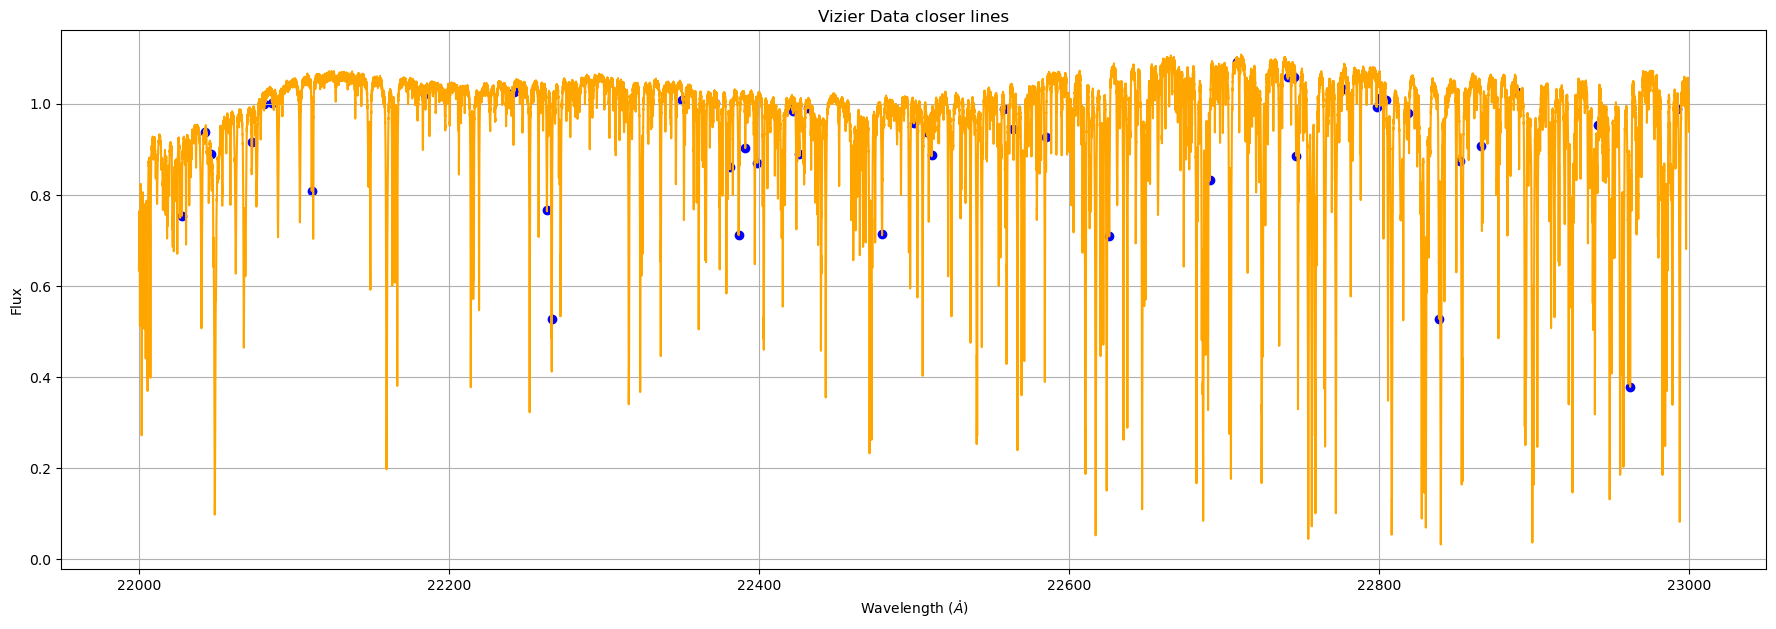

In [24]:
fig3, ax = plt.subplots(1,1,figsize=(22,7))
ax.plot(data_22000_23000['Wave A'],data_22000_23000['nFlux'], color='orange')
ax.scatter(closer_lines_22000_23000['min_wave'],closer_lines_22000_23000['min_flux'], color='blue')
ax.set_title('Vizier Data closer lines')
ax.set_xlabel(r'Wavelength $(\mathring{A})$')
ax.set_ylabel('Flux')
ax.grid()

In [ ]:
#Localize the line and save the width for lines
def width_minimums(closer_lines,data,width):
    local_points =[]
    for each in closer_lines['min_wave']:
        #This append all the part of the dataframe in that range
        local_points.append(data[data['Wave A'].between(each-width, each+width, inclusive='neither')])

    return local_points

#Data
local_points_10000_11000 = width_minimums(closer_lines_10000_11000,data_10000_11000,0.3)
local_points_11000_12000 = width_minimums(closer_lines_11000_12000,data_11000_12000,0.3)
local_points_12000_13000 = width_minimums(closer_lines_12000_13000,data_12000_13000,0.3)
local_points_13000_14000 = width_minimums(closer_lines_13000_14000,data_13000_14000,0.3)
local_points_14000_15000 = width_minimums(closer_lines_14000_15000,data_14000_15000,0.3)
local_points_15000_16000 = width_minimums(closer_lines_15000_16000,data_15000_16000,0.3)
local_points_16000_17000 = width_minimums(closer_lines_16000_17000,data_16000_17000,0.3)
local_points_17000_18000 = width_minimums(closer_lines_17000_18000,data_17000_18000,0.3)
local_points_18000_19000 = width_minimums(closer_lines_18000_19000,data_18000_19000,0.3)
local_points_19000_20000 = width_minimums(closer_lines_19000_20000,data_19000_20000,0.3)
local_points_20000_21000 = width_minimums(closer_lines_20000_21000,data_20000_21000,0.3)
local_points_21000_22000 = width_minimums(closer_lines_21000_22000,data_21000_22000,0.3)
local_points_22000_23000 = width_minimums(closer_lines_22000_23000,data_22000_23000,0.3)

### Derivates and fit

In [28]:
def Fit_derivates(local_points,lamda_list):
    values = []
    fit = []

    for i in range(0,len(local_points)):

        data_wave, data_flux = local_points[i]['Wave A'], local_points[i]['nFlux'] #The index i correspond at one line in the lambda_list of lines 

        #Internal rise, with the mean and std just for the big data (wavenumber)
        wave_mean, wave_std = np.mean(data_wave), np.std(data_wave) 
        wave_scaled = (data_wave - wave_mean)/wave_std if wave_std != 0 else data_wave #take the conditional for the division

        #Polynomial Fit is better for numerical aproximation than polyfit
        pol = Polynomial.fit(wave_scaled, data_flux, 4)

        #Scaled coeficients of fit
        param = pol.convert().coef

        #Calculate the derivates without evaluate the point, polyder takes the derivate of the polinomium
        d_param = poly.polyder(param) #First
        d2_param = poly.polyder(d_param) #Second
        d3_param = poly.polyder(d2_param) #Third

        #The fit values
        flux_fit = poly.polyval(wave_scaled,param)

        #Find the minimum with the regression and derivates
        roots = poly.polyroots(d_param).real #roots or critical points
        valid_roots = np.array([x for x in roots if poly.polyval(x,d2_param)>0] )#check with the second derivate, just positive values for minimums
        
        if valid_roots.size >0:
            value_roots = pol(valid_roots) #evaluate in the polinomium for the global minimum
            minimal_root = valid_roots[np.where(value_roots == min(value_roots))][0] , min(value_roots) #take the values

            #For the lambda convert the minimal root in wave with the scale of the mean, we dont scale the flux data
            lamda_obs = [round(minimal_root[0]*wave_std + wave_mean,4), minimal_root[1]]

            #Evaluate the second and third derivate in the lambda observed
            #Formula for the third derivate
            def Third_Derivate(second, third):
                return -((third)/(3*(second**2)))

            d2 = poly.polyval(minimal_root[0],d2_param) / (wave_std ** 2) #Re-scalated the coefficients
            d3 = Third_Derivate(d2, poly.polyval(minimal_root[0],d3_param) / (wave_std ** 3) ) 

            #Calculate the velocity and convective blueshift
            blueshift = ((lamda_obs[0]/lamda_list[i]) - 1)* const.c
            velocity = round((blueshift) - 633) #Formula for relativistic aproximation

    
            values.append(pd.DataFrame([[lamda_list[i],lamda_obs[0],lamda_obs[1],velocity,d2,d3,blueshift]])) #natural lambda, observed lambda, flux, velocity, second derivate, third derivate

            fit.append(flux_fit)

    Values =  pd.concat(values,axis=0).reset_index(drop=True)

    Values.columns = ["Lambda natural", "Lambda observed", "Flux",'Velocity','2nd Derivate','3rd Derivate','Blueshift']


    return Values

#Values
Values_10000_11000 = Fit_derivates(local_points_10000_11000,lambda_10000_11000['Nave list'])
Values_11000_12000 = Fit_derivates(local_points_11000_12000,lambda_11000_12000['Nave list'])
Values_12000_13000 = Fit_derivates(local_points_12000_13000,lambda_12000_13000['Nave list'])
Values_13000_14000 = Fit_derivates(local_points_13000_14000,lambda_13000_14000['Nave list'])
Values_14000_15000 = Fit_derivates(local_points_14000_15000,lambda_14000_15000['Nave list'])
Values_15000_16000 = Fit_derivates(local_points_15000_16000,lambda_15000_16000['Nave list'])
Values_16000_17000 = Fit_derivates(local_points_16000_17000,lambda_16000_17000['Nave list'])
Values_17000_18000 = Fit_derivates(local_points_17000_18000,lambda_17000_18000['Nave list'])
Values_18000_19000 = Fit_derivates(local_points_18000_19000,lambda_18000_19000['Nave list'])
Values_19000_20000 = Fit_derivates(local_points_19000_20000,lambda_19000_20000['Nave list'])
Values_20000_21000 = Fit_derivates(local_points_20000_21000,lambda_20000_21000['Nave list'])
Values_21000_22000 = Fit_derivates(local_points_21000_22000,lambda_21000_22000['Nave list'])
Values_22000_23000 = Fit_derivates(local_points_22000_23000,lambda_22000_23000['Nave list'])

Values_22000_23000 

,Lambda natural,Lambda observed,Flux,Velocity,2nd Derivate,3rd Derivate,Blueshift
0,22027.790260,22027.7484,0.754646,-1203,23.394906,-0.276157,-569.706257
1,22042.842469,22042.8338,0.938086,-751,9.306062,-0.916431,-117.897114
2,22046.292806,22046.2736,0.891569,-894,6.855850,5.240958,-261.164272
3,22080.953191,22080.9445,1.001222,-751,32.091167,-0.206566,-117.991851
4,22085.927510,22085.8891,1.002828,-1154,10.937543,0.071974,-521.368143
5,22111.566118,22111.4827,0.807391,-1764,58.620846,0.026678,-1130.995816
6,22184.262484,22184.2470,1.020438,-842,5.421965,-2.369457,-209.249440
7,22242.141295,22242.1649,1.026428,-315,25.798063,0.029997,318.156104
8,22245.159453,22245.2046,1.032654,-25,21.058396,0.287856,608.430760
9,22263.186485,22263.0610,0.723179,-2323,37.367190,0.272954,-1689.765440


## Visualizer for Fe lines with the fit

In [ ]:
# import tkinter as tk
# from tkinter import ttk
# import matplotlib.pyplot as plt
# from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
# import numpy as np

# class OutlierViewer:
#     def __init__(self, root, local_points, values,fit):
#         self.root = root
#         self.root.title("Visualizador Interactivo de Outliers")
#         self.local_points = local_points
#         self.values = values
#         self.fit = fit
#         self.index = values.index.values
#         self.current_index = 0
       
#         self.setup_ui()
#         self.update_plot()
    
#     def setup_ui(self):
#         main_frame = ttk.Frame(self.root, padding="10")
#         main_frame.pack(fill=tk.BOTH, expand=True)
        
#         control_frame = ttk.Frame(main_frame)
#         control_frame.pack(fill=tk.X, pady=10)
        
#         ttk.Label(control_frame, text="Índice de Outlier:").pack(side=tk.LEFT, padx=5)
#         self.slider = ttk.Scale(
#             control_frame,
#             from_=0,
#             to=len(self.index)-1,
#             orient=tk.HORIZONTAL,
#             command=self.on_slider_move
#         )
#         self.slider.pack(side=tk.LEFT, expand=True, fill=tk.X, padx=5)
        
#         self.spinbox = ttk.Spinbox(
#             control_frame,
#             from_=0,
#             to=len(self.index)-1,
#             width=5,
#             command=self.on_spinbox_change
#         )
#         self.spinbox.pack(side=tk.LEFT, padx=5)
#         self.spinbox.bind("<Return>", self.on_spinbox_change)
        
#         nav_frame = ttk.Frame(control_frame)
#         nav_frame.pack(side=tk.LEFT, padx=10)
        
#         ttk.Button(nav_frame, text="← Anterior", command=self.prev_plot).pack(side=tk.LEFT)
#         ttk.Button(nav_frame, text="Siguiente →", command=self.next_plot).pack(side=tk.LEFT, padx=5)
     
#         graph_frame = ttk.Frame(main_frame)
#         graph_frame.pack(fill=tk.BOTH, expand=True)
       
#         self.fig, self.ax = plt.subplots(figsize=(10, 6))
#         self.canvas = FigureCanvasTkAgg(self.fig, master=graph_frame)
#         self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
        
#         self.toolbar = NavigationToolbar2Tk(self.canvas, graph_frame)
#         self.toolbar.update()
#         self.canvas._tkcanvas.pack(fill=tk.BOTH, expand=True)
    
#     def on_slider_move(self, event=None):
#         self.current_index = int(float(self.slider.get()))
#         self.spinbox.delete(0, tk.END)
#         self.spinbox.insert(0, str(self.current_index))
#         self.update_plot()
    
#     def on_spinbox_change(self, event=None):
#         try:
#             new_index = int(self.spinbox.get())
#             if 0 <= new_index < len(self.index):
#                 self.current_index = new_index
#                 self.slider.set(self.current_index)
#                 self.update_plot()
#         except ValueError:
#             pass
    
#     def prev_plot(self):
#         if self.current_index > 0:
#             self.current_index -= 1
#             self.slider.set(self.current_index)
#             self.spinbox.delete(0, tk.END)
#             self.spinbox.insert(0, str(self.current_index))
#             self.update_plot()
    
#     def next_plot(self):
#         if self.current_index < len(self.index)-1:
#             self.current_index += 1
#             self.slider.set(self.current_index)
#             self.spinbox.delete(0, tk.END)
#             self.spinbox.insert(0, str(self.current_index))
#             self.update_plot()
    
#     #Graficas
#     def update_plot(self):
#         j = self.current_index
#         self.ax.clear()
        
#         # Gráfica principal
#         self.ax.plot(
#             self.local_points[j]['Wave A'],
#             self.local_points[j]['nFlux'],
#             color='orange',
#             label='Espectro'
#         )
        
#         #Closer lines
#         self.ax.plot(
#             self.local_points[j]['Wave A'],
#             self.fit[j],
#             color='blue',
#             label='Fit',
#             marker='.',
#         )
        
#         #Puntos de la lista de Fe
#         self.ax.scatter(
#             self.values['Lambda observed'][j],
#             self.values['Flux'][j],
#             color='blue',
#             label='lambda',
#             s=100
#         )
        
#         #Vainitas del gráfico
#         self.ax.set_title(f'Visualizer - Índice {self.index[j]}')
#         self.ax.set_xlabel(r'Wavelength $(\mathring{A})$')
#         self.ax.set_ylabel('Flux')
#         self.ax.legend()
#         self.ax.grid(True)
        
#         self.canvas.draw()


# if __name__ == "__main__":
#     root = tk.Tk()
#     root.geometry("900x700")

#     app = OutlierViewer(root, local_points_9000_10000, Values_9000_10000,fit)

#     root.mainloop()

In [30]:
Values = pd.concat([Values_10000_11000, Values_11000_12000, Values_12000_13000, Values_13000_14000,
                    Values_14000_15000, Values_15000_16000, Values_16000_17000, Values_17000_18000,
                    Values_18000_19000, Values_19000_20000, Values_20000_21000 ,Values_21000_22000, 
                    Values_22000_23000],axis=0).reset_index(drop=True)


In [ ]:
#Convert to excel
# Values.to_excel('valores_NIR.xlsx', index=False)

### Graphics 

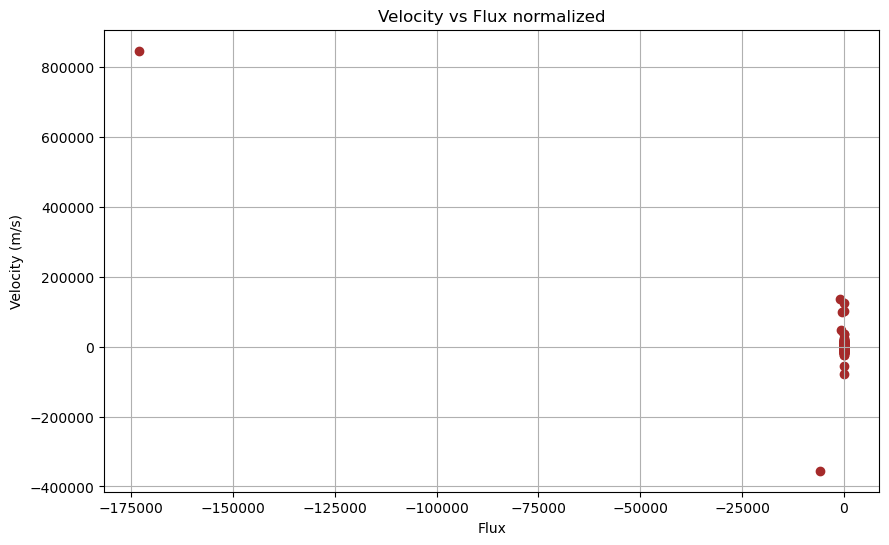

In [31]:
#Velocity vs Flux 
fig5, ax = plt.subplots(1,1,figsize=(10,6))

ax.scatter(Values['Flux'],Values['Velocity'],color='brown')
ax.set_title('Velocity vs Flux normalized')
ax.set_xlabel(r'Flux')
ax.set_ylabel('Velocity (m/s)')
ax.grid()
# fig5.savefig('Velocity.png')

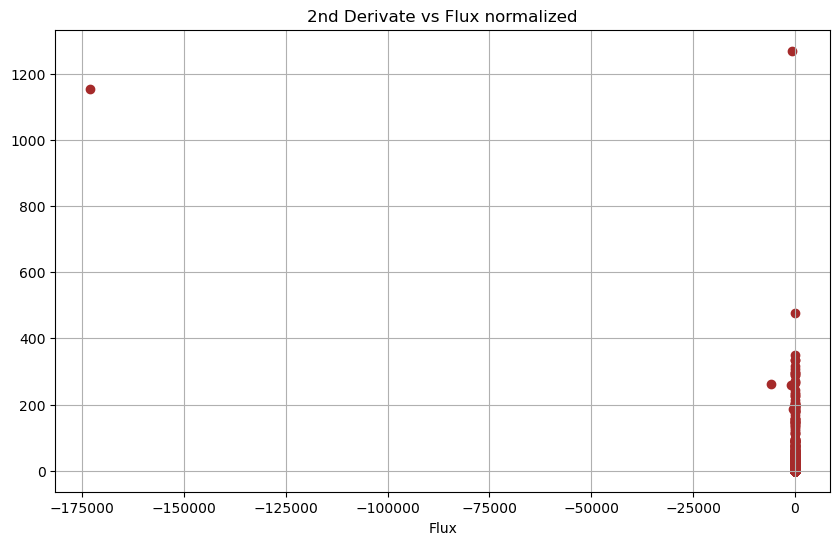

In [32]:
#2nd Derivate vs Flux
fig6, ax = plt.subplots(1,1,figsize=(10,6))

ax.scatter(Values['Flux'],Values['2nd Derivate'], color='brown')
ax.set_title('2nd Derivate vs Flux normalized')
ax.set_xlabel(r'Flux')
ax.grid()
# fig6.savefig('2Derivate.png')

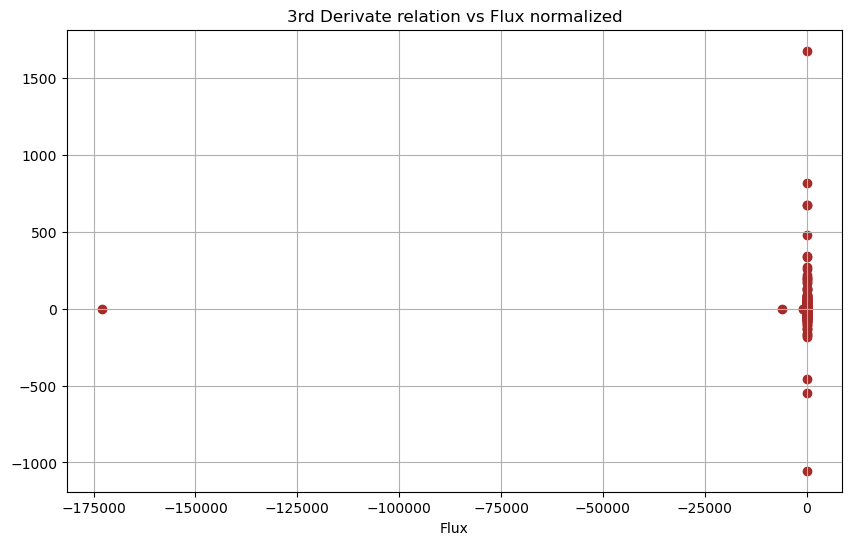

In [33]:
#3rd Derivate vs Flux
fig7, ax = plt.subplots(1,1,figsize=(10,6))

ax.scatter(Values['Flux'],Values['3rd Derivate'], color='brown')
ax.set_title('3rd Derivate relation vs Flux normalized')
ax.set_xlabel(r'Flux')
ax.grid()
# fig7.savefig('3Derivate.png')

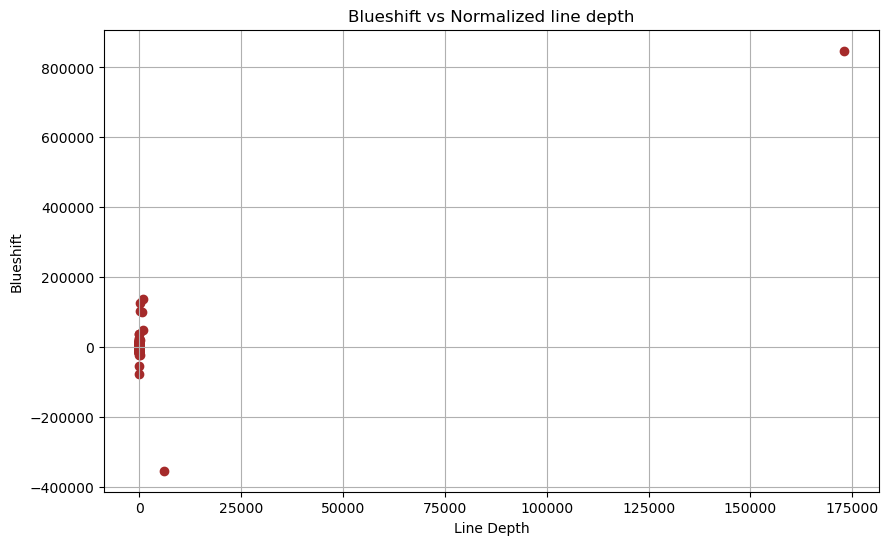

In [34]:
#Granulation pattern
fig8, ax = plt.subplots(1,1,figsize=(10,6))

ax.scatter(1-Values['Flux'],Values['Blueshift'], color='brown')
ax.set_title('Blueshift vs Normalized line depth')
ax.set_xlabel(r'Line Depth')
ax.set_ylabel(r'Blueshift')
ax.grid()
# fig8.savefig('Blueshift.png')